### Importing

In [19]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import json

## Merging all data

In [2]:
files = [file for file in os.listdir("../datasets/Sales_Data")]
data = pd.DataFrame()

for file in files:
    df = pd.read_csv("../datasets/Sales_Data/"+file)
    data = pd.concat([data, df])
data.to_csv("../datasets/sales_data_combined")

### Cleaning

In [3]:
all_data = data
all_data = all_data.dropna().reset_index()

temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']
to_drop= temp_data.index
all_data.drop(index=to_drop, inplace = True)
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data[['Month', 'Quantity Ordered']] = all_data[['Month', 'Quantity Ordered']].astype('int32')
all_data

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...,...
186300,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186301,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186302,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186303,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### creating total sales col

In [4]:
all_data['Price Each'] = all_data['Price Each'].astype('float32')

In [5]:
all_data['total_sales'] = all_data['Price Each']*all_data['Quantity Ordered']


# max sales calculation

result= all_data.groupby('Month').sum()
result

,index,Quantity Ordered,Price Each,total_sales
Month,,,,
1,47433245,10903,1811768.375,1.822257e+06
2,72123197,13449,2188884.750,2.202022e+06
3,115333587,17005,2791207.750,2.807100e+06
4,167977608,20558,3367671.000,3.390670e+06
5,137829259,18667,3135125.000,3.152607e+06
6,92330356,15253,2562025.500,2.577802e+06
7,102752005,16072,2632539.500,2.647776e+06
8,71824951,13448,2230345.500,2.244468e+06
9,67863032,13109,2084992.125,2.097560e+06


#### month with best sales

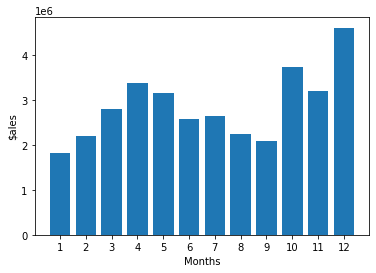

In [6]:
## plotting
months= range(1, 13)
plt.bar(months, result['total_sales'])
plt.xticks(months)
plt.ylabel('$ales')
plt.xlabel('Months')
plt.show()

#### month with best sales

In [7]:
all_data['city'] = all_data['Purchase Address'].str.extract(", (\w.*, \w{1,})")
res = all_data.groupby(by='city').sum()

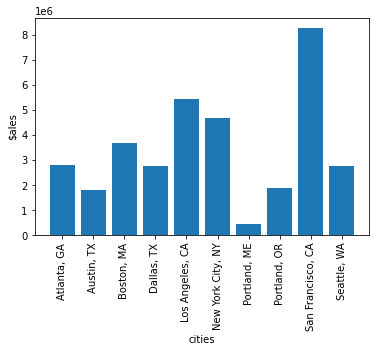

In [8]:
cities = [city for city, df in all_data.groupby('city')]
plt.bar(cities, res['total_sales'])
plt.xticks(cities, rotation= 'vertical')
plt.ylabel('$ales')
plt.xlabel('cities')
plt.show()


#### The best hours for advertising

In [9]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hours'] = all_data['Order Date'].dt.hour
all_data

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,city,Hours
0,0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,"Dallas, TX",8
1,2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,"Boston, MA",22
2,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,"Los Angeles, CA",14
3,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,"Los Angeles, CA",14
4,5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,"Los Angeles, CA",9
...,...,...,...,...,...,...,...,...,...,...,...
186300,11681,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.970000,"Los Angeles, CA",20
186301,11682,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.000000,"San Francisco, CA",16
186302,11683,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.000000,"San Francisco, CA",7
186303,11684,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.989990,"San Francisco, CA",17


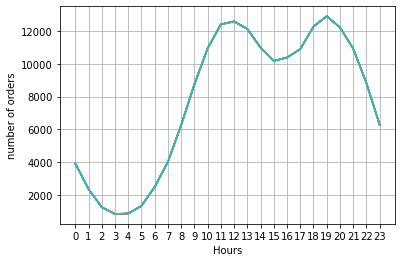

In [10]:
hours = [hours for hours, df in all_data.groupby('Hours')]
plt.plot(hours, all_data.groupby('Hours').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('number of orders')
plt.show()


### Which products were bought together

In [11]:
df = all_data[all_data['Order ID'].duplicated(keep= False)]
df['Bought together'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[df['Order ID'].duplicated(keep= 'first')]

<ipython-input-11-23141a719568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bought together'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [12]:
df.drop(columns=['Product'], inplace= True)

In [27]:
#PBT = products bought together 
df['number of PBT'] = df['Bought together'].apply(lambda x: len(x.split(',')))
df = df[['Order ID', 'Bought together']].drop_duplicates()

count= Counter()
for items in df['Bought together']:
    items_list = items.split(',')
    count.update(Counter(combinations(items_list, 3)))
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

### What product sold the most and why?

In [28]:
all_data

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,city,Hours
0,0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,"Dallas, TX",8
1,2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,"Boston, MA",22
2,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,"Los Angeles, CA",14
3,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,"Los Angeles, CA",14
4,5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,"Los Angeles, CA",9
...,...,...,...,...,...,...,...,...,...,...,...
186300,11681,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.970000,"Los Angeles, CA",20
186301,11682,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.000000,"San Francisco, CA",16
186302,11683,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.000000,"San Francisco, CA",7
186303,11684,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.989990,"San Francisco, CA",17


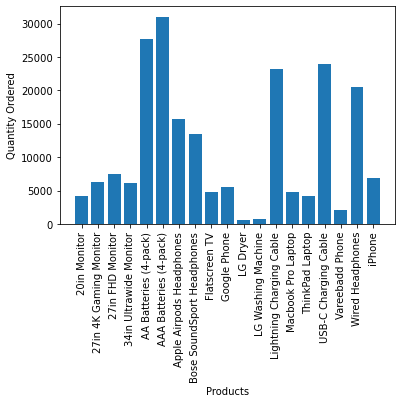

In [41]:
products_sold= all_data.groupby('Product')
quantity_sold = products_sold.sum()['Quantity Ordered']
product = [product for product, df in products_sold]
plt.bar(product, quantity_sold)
plt.xticks(product, rotation= 'vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

<ipython-input-51-1bc73f6814f8>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation = 'vertical')


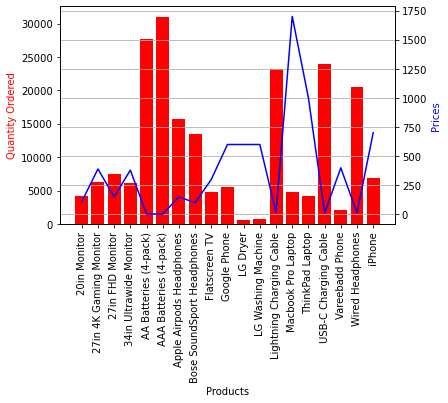

In [51]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_sold, color='r')
ax2.plot(product, prices, '-b')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color= 'r')
ax2.set_ylabel('Prices', color= 'b')
ax1.set_xticklabels(product, rotation = 'vertical')
plt.grid()
plt.show()